In [2]:
import cv2
import matplotlib.pyplot as plt
from skimage import morphology
from utils import pruning, getSkeletonIntersection, removeCross
import numpy as np

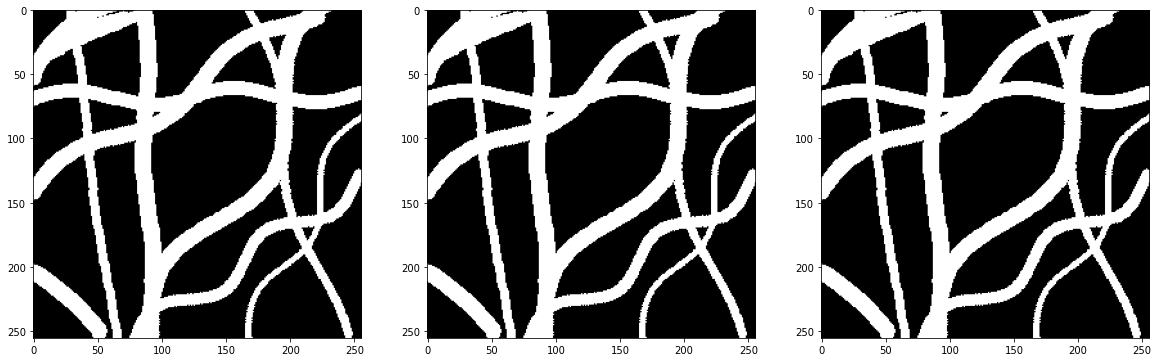

In [3]:
imgPath = "_sample.png"

rgb_img = cv2.imread(imgPath)
gray_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)
_,bin_img = cv2.threshold(gray_img,127,255,cv2.THRESH_BINARY)

plt.figure(figsize=(20,10))
plt.subplot(131), plt.imshow(rgb_img)
plt.subplot(132), plt.imshow(gray_img, cmap='gray')
plt.subplot(133), plt.imshow(bin_img, cmap='gray')
plt.show()

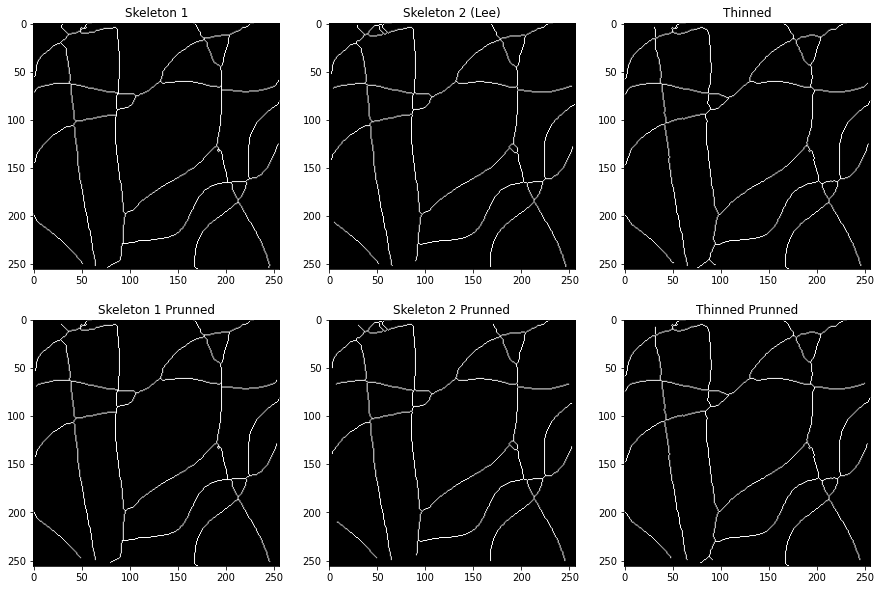

In [5]:
bin_img[bin_img==255] = 1
skeleton1 = morphology.skeletonize(bin_img)
skeleton2 = morphology.skeletonize(bin_img, method='lee')
thinned = morphology.thin(bin_img)
prunned1 = pruning(skeleton1,3)
prunned2 = pruning(skeleton2,3)
prunned3 = pruning(thinned,3)

plt.figure(figsize=(15,10))
plt.subplot(231), plt.title('Skeleton 1'), plt.imshow(skeleton1,cmap='gray')
plt.subplot(232), plt.title('Skeleton 2 (Lee)'), plt.imshow(skeleton2,cmap='gray')
plt.subplot(233), plt.title('Thinned'), plt.imshow(thinned,cmap='gray')
plt.subplot(234), plt.title('Skeleton 1 Prunned'), plt.imshow(prunned1,cmap='gray')
plt.subplot(235), plt.title('Skeleton 2 Prunned'), plt.imshow(prunned2,cmap='gray')
plt.subplot(236), plt.title('Thinned Prunned'), plt.imshow(prunned3,cmap='gray')
plt.show()

float32


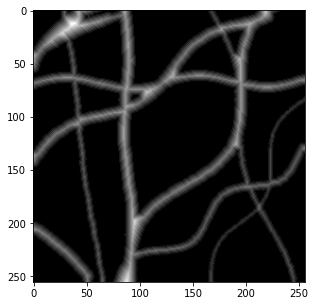

In [11]:
# distance_map = cv2.distanceTransform(bin_img,cv2.DIST_L2, cv2.DIST_MASK_3)
distance_map = cv2.distanceTransform(bin_img, cv2.DIST_C, cv2.DIST_MASK_3)

print(distance_map.dtype)

plt.figure(figsize=(5,5))
plt.imshow(distance_map, cmap='gray')
plt.show()

In [12]:
intersecciones = getSkeletonIntersection(skeleton2)

print(type(intersecciones))
intersecciones

<class 'list'>


[(92, 229),
 (212, 186),
 (40, 12),
 (44, 103),
 (28, 22),
 (87, 90),
 (221, 165),
 (177, 17),
 (88, 73),
 (194, 135),
 (96, 199),
 (194, 66),
 (37, 63),
 (51, 3),
 (203, 14),
 (131, 61),
 (201, 165),
 (60, 10),
 (106, 77),
 (194, 46)]

bool
uint8


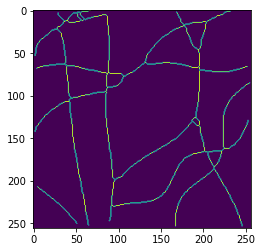

In [23]:
print(skeleton1.dtype)
print(skeleton2.dtype)

plt.imshow(skeleton2)

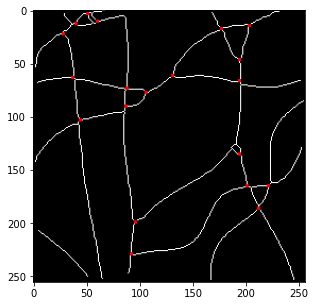

In [24]:
# mostrando las intersecciones
RGB = np.zeros((skeleton2.shape[0],skeleton2.shape[1],3), dtype=np.uint8)
# RGB[skeleton2]  = [255,255,255]
# RGB[~skeleton2] = [0,0,0]
RGB[skeleton2==1]  = [255,255,255]
RGB[skeleton2==0] = [0,0,0]

for cross in intersecciones:
  #thinnedInter[cross[1]][cross[0]] = False
  x = cross[1]
  y = cross[0]
  x_1, y_1, x1, y1 = x-1, y-1, x+1, y+1; 
  #vecinos = neighbours(cross[1],cross[0],thinned)
  #print(vecinos)
  RGB[x,y] = [0,0,255]
  RGB[x_1,y] = [0,0,255]
  RGB[x_1,y1] = [0,0,255]
  RGB[x][y1] = [0,0,255]
  RGB[x1][y1] = [0,0,255]
  RGB[x1][y] = [0,0,255]
  RGB[x1][y_1] = [0,0,255]
  RGB[x][y_1] = [0,0,255]
  RGB[x_1][y_1] = [0,0,255]

plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(RGB, cv2.COLOR_BGR2RGB))
plt.show()

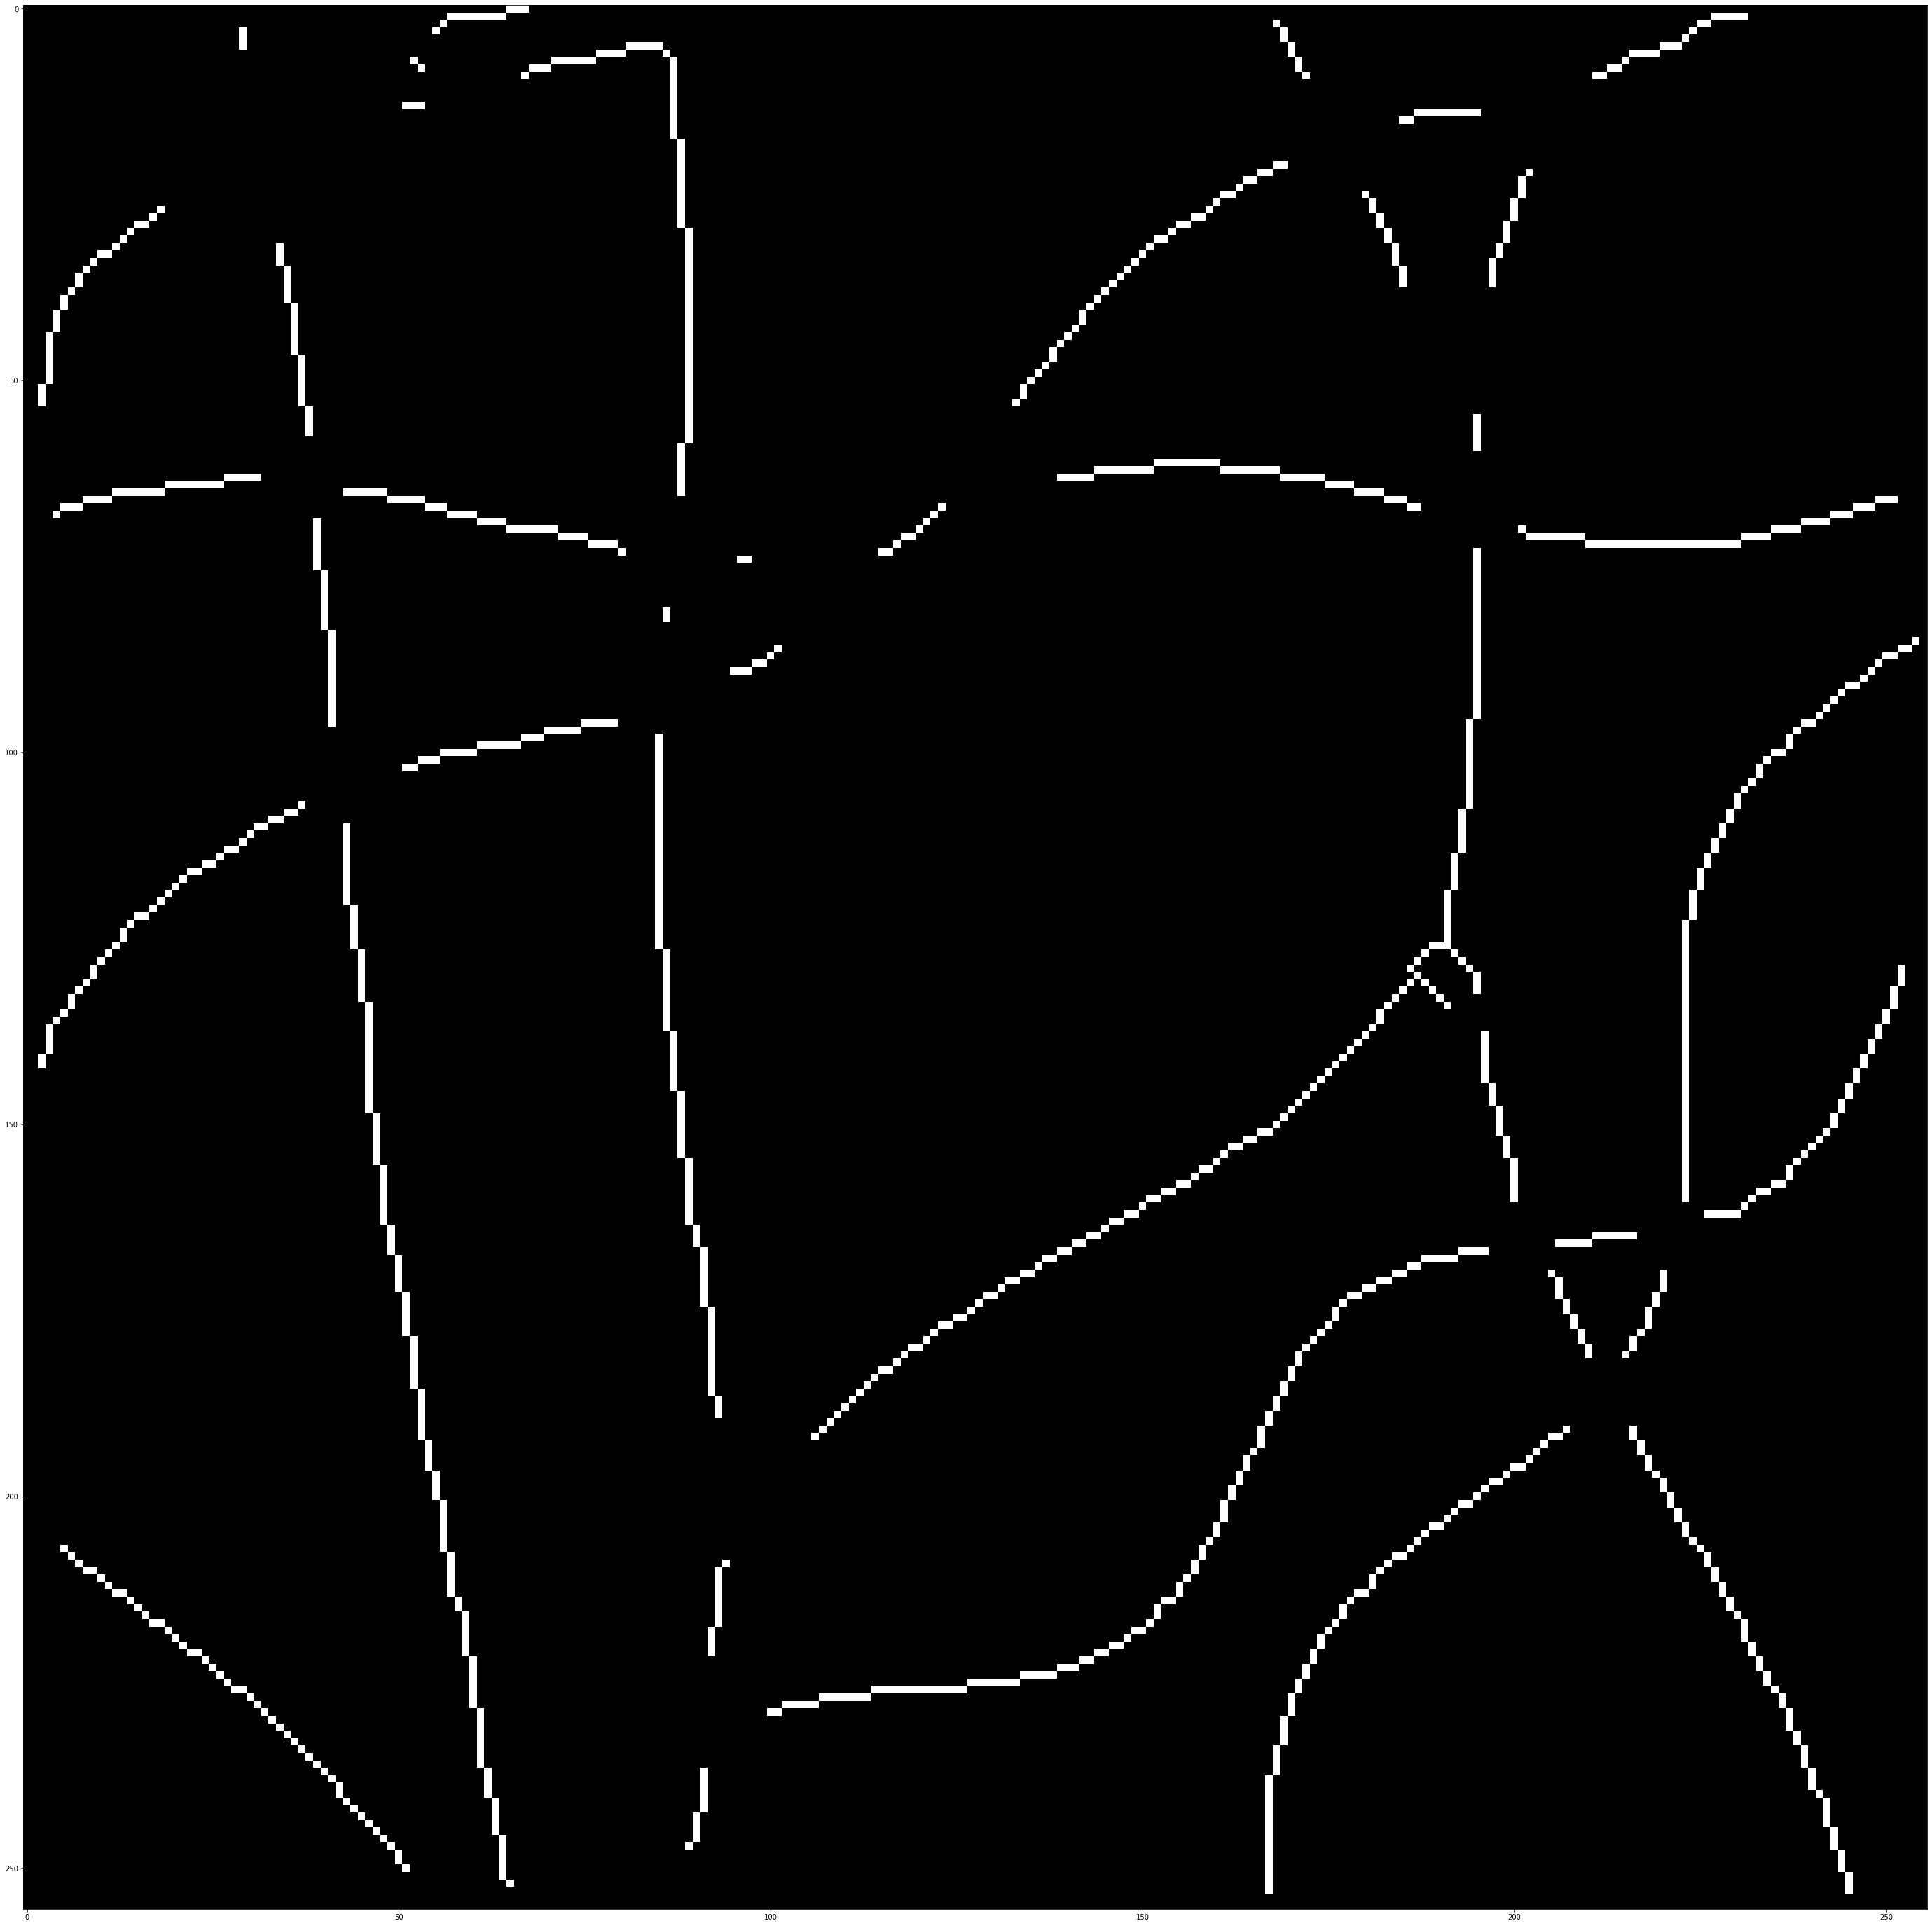

In [25]:
uncrossed = skeleton2.copy()

for cross in intersecciones:
  uncrossed = removeCross(cross, distance_map, uncrossed)

plt.figure(figsize=(50,50))
plt.imshow(uncrossed, cmap='gray')
plt.show()

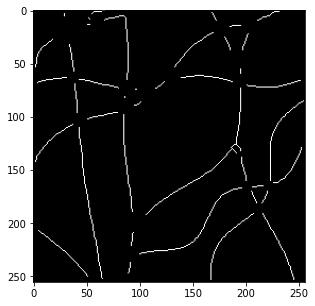

In [27]:
from new_distance_transform import removeCrosses

uncrossed2 = removeCrosses(skeleton2, distance_map, intersecciones)
plt.figure(figsize=(5,5))
plt.imshow(uncrossed2, cmap='gray')

In [12]:
# conteo de pixeles
rows,cols = uncrossed.shape

diameters = dict()

for x in range(0, rows):
    for y in range(0, cols):
      #print(uncrossed[x][y])
      if(uncrossed[x,y]):
        # obtener diametro
        #print(distanceMap[x,y].astype('uint8')*2)
        #diameter = distance_map[x,y].astype('uint8')*2
        diameter = math.floor(distance_map[x,y]*2)
        #diameter = ((distance_map[x,y]-1)*2+1).astype('uint8')
        
        if(diameter in diameters):
          diameters[diameter]+=1
        else:
          diameters[diameter]=1
        
sorted(diameters.items())

[(1, 1),
 (2, 2),
 (3, 2),
 (4, 4),
 (5, 17),
 (6, 52),
 (7, 38),
 (9, 4),
 (10, 2),
 (11, 122),
 (12, 157),
 (13, 206),
 (14, 1),
 (15, 5),
 (17, 2),
 (18, 3)]

In [10]:
diametros = {}
diametros_dm = np.floor(distance_map[uncrossed>0]*2)
unique, counts = np.unique(diametros_dm, return_counts=True)
diametros = dict(zip(unique, counts))

diametros

{1.0: 1,
 2.0: 2,
 3.0: 2,
 4.0: 4,
 5.0: 17,
 6.0: 52,
 7.0: 38,
 9.0: 4,
 10.0: 2,
 11.0: 122,
 12.0: 157,
 13.0: 206,
 14.0: 1,
 15.0: 5,
 17.0: 2,
 18.0: 3}

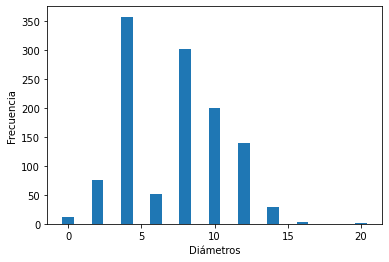

In [32]:
plt.bar(list(diameters.keys()), diameters.values())
plt.ylabel('Frecuencia')
plt.xlabel('Diámetros')
plt.show()

In [33]:
suma = 0
contador = 0
for k,v in diameters.items():
  suma += k*v
  contador += v

print('contador = ', contador)
print('promedio = ', suma / contador)

contador =  1169
promedio =  7.240376390076989


In [89]:
# pruebas
img = np.array([[0, 1, 1, 1, 1, 0],[0, 1, 1, 1, 1, 0],[0, 1, 1, 1, 1, 0],[0, 1, 1, 1, 1, 0]], dtype=np.dtype('uint8'))

img.shape

(4, 6)

In [90]:
im_dm = cv2.distanceTransform(img, cv2.DIST_L2, 3)

math.floor(im_dm.max()*2)

3

In [91]:
print(im_dm)

[[0.         0.95500183 1.9100037  1.9100037  0.95500183 0.        ]
 [0.         0.95500183 1.9100037  1.9100037  0.95500183 0.        ]
 [0.         0.95500183 1.9100037  1.9100037  0.95500183 0.        ]
 [0.         0.95500183 1.9100037  1.9100037  0.95500183 0.        ]]


In [92]:
skeleton1 = morphology.skeletonize(img)

In [93]:
skeleton1

array([[False, False, False,  True, False, False],
       [False, False, False,  True, False, False],
       [False, False,  True, False, False, False],
       [False, False, False, False, False, False]])